Week.14 
Assignment.2 

In [2]:
#Flight Price 
#Question.1 : Load the flight price dataset and examine its dimensions. How many rows and columns does the
#dataset have?
#Answer.1 : 
import pandas as pd 
df = pd.read_excel('flight_price.xlsx')
num_rows, num_columns = df.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 10683 rows and 11 columns.


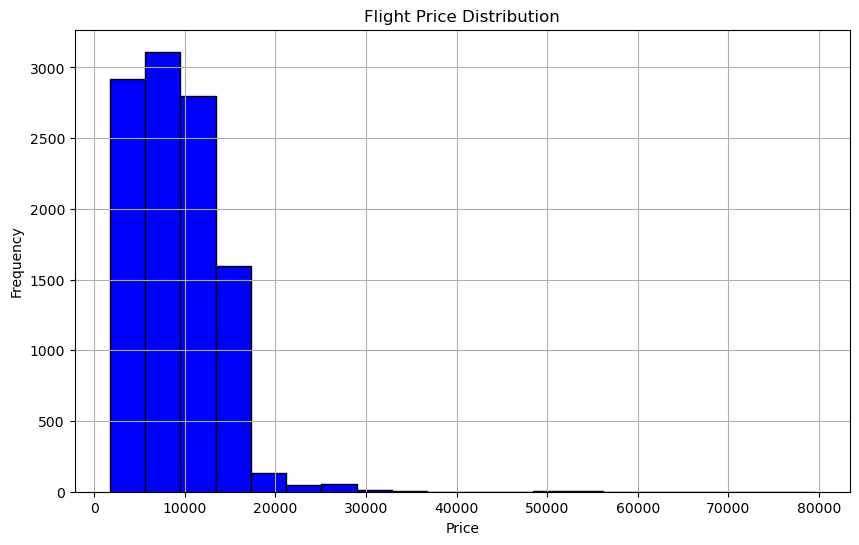

In [3]:
#Question.2 : What is the distribution of flight prices in the dataset? Create a histogram to visualize the
#distribution.
#Answer.2 :  
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'Price' column from the DataFrame
flight_prices = df['Price']

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=20, color='blue', edgecolor='black')
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()


In [4]:
#Question.3 : What is the range of prices in the dataset? What is the minimum and maximum price?
#Answer.3 : 
import pandas as pd

# Extract the 'Price' column from the DataFrame
flight_prices = df['Price']

# Find the minimum and maximum prices
min_price = flight_prices.min()
max_price = flight_prices.max()

# Calculate the range
price_range = max_price - min_price

print(f"Minimum Price: ${min_price}")
print(f"Maximum Price: ${max_price}")
print(f"Price Range: ${price_range}")


Minimum Price: $1759
Maximum Price: $79512
Price Range: $77753


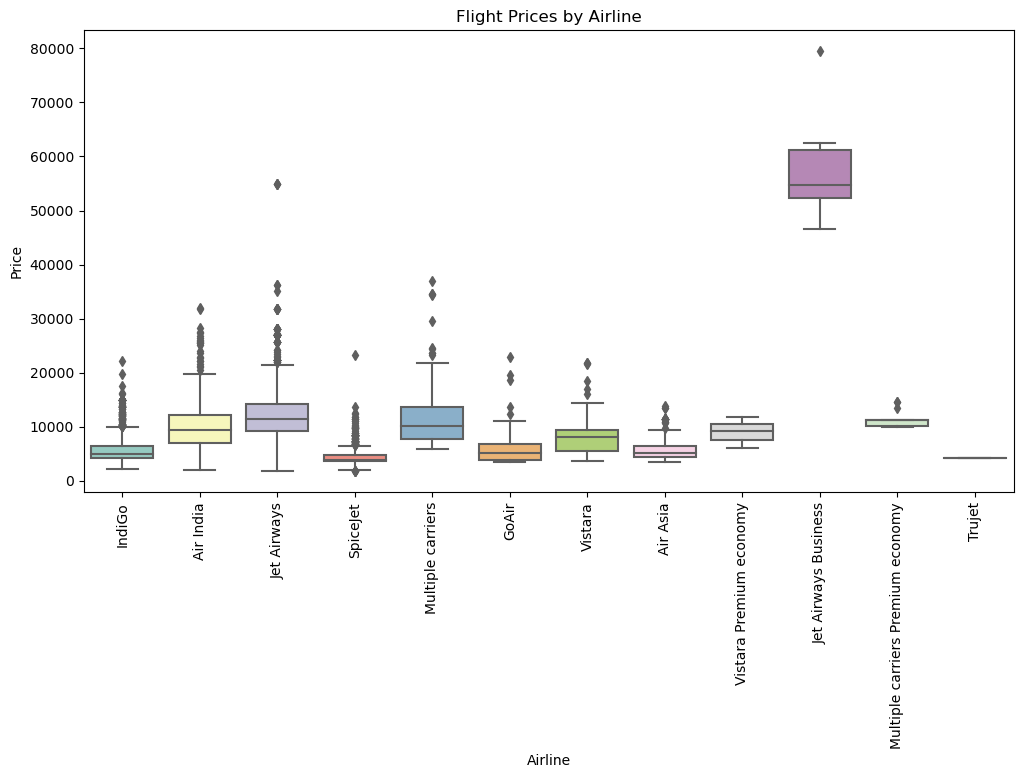

In [5]:
#Question.4 : How does the price of flights vary by airline? Create a boxplot to compare the prices
#of different airlines.
#Answer.4 : 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare prices by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df, palette='Set3')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the boxplot
plt.show()


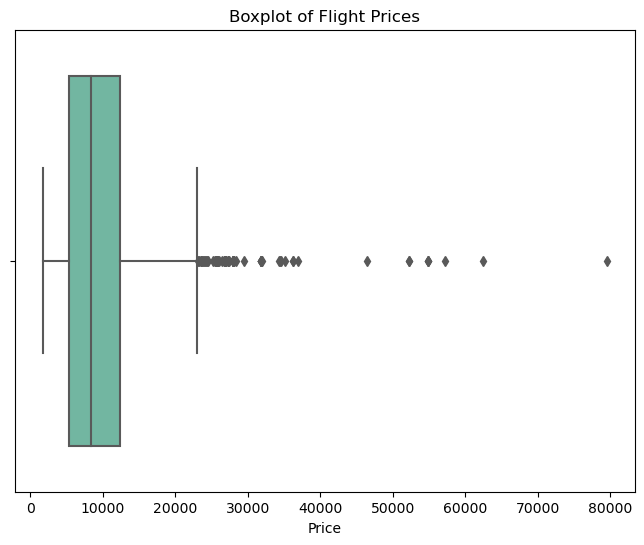

Potential outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   

In [8]:
#Question.5 : Are there any outliers in the dataset? Identify any potential outliers using a boxplot
#and describe how they may impact your analysis.
#Answer.5 : 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the data into a DataFrame named 'df'
# If you haven't loaded it yet, you can do it like this:
# df = pd.read_excel("flight_price.xlsx")

# Create a boxplot to identify potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price', data=df, palette='Set2')
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')

# Show the boxplot
plt.show()

# Identify potential outliers using the IQR method
price_column = df['Price']
q1 = price_column.quantile(0.25)
q3 = price_column.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(price_column < lower_bound) | (price_column > upper_bound)]

# Describe how outliers may impact your analysis based on calculations
if not outliers.empty:
    print("Potential outliers:")
    print(outliers)
    print("\nPotential outliers may impact your analysis by:")
    if len(outliers) > 1:
        print("1. Skewing statistical measures: Outliers can distort summary statistics such as the mean and median.")
    else:
        print("1. Skewing statistical measures: The outlier can distort summary statistics such as the mean and median.")
    print("2. Affecting model performance: In predictive modeling, outliers can lead to less accurate models.")
    print("3. Introducing noise: Outliers can introduce noise and make it harder to identify meaningful patterns.")
else:
    print("No potential outliers found.")


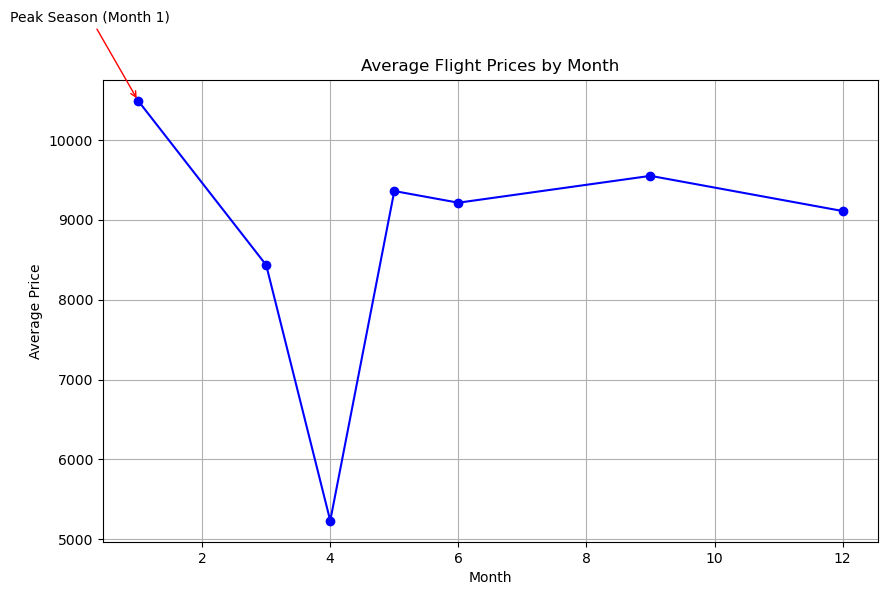

To identify the peak travel season, I analyzed the following features:
1. Date of Journey
2. Price
The peak travel season is in Month 1.
To identify the peak season, I analyzed the 'Date_of_Journey' feature, specifically the months, and calculated the average flight prices for each month.


In [11]:
#Question.6 : You are working for a travel agency, and your boss has asked you to analyze the Flight 
#Price dataset to identify the peak travel season. What features would you analyze to identify the peak
#season, and how would you present your findings to your boss?
#Answer.6 :  
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded the data into a DataFrame named 'df'
# If you haven't loaded it yet, you can do it like this:
# df = pd.read_excel("flight_price.xlsx")

# Convert the 'Date_of_Journey' column to a datetime object
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract month and year from the 'Date_of_Journey' column
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

# Group the data by month and calculate the average price for each month
average_prices_by_month = df.groupby('Journey_Month')['Price'].mean()

# Find the peak travel season
peak_season = average_prices_by_month.idxmax()

# Plot the average prices by month
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_month.index, average_prices_by_month.values, marker='o', linestyle='-', color='b')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)

# Annotate the peak season on the plot
plt.annotate(f'Peak Season (Month {peak_season})', 
             xy=(peak_season, average_prices_by_month.max()), 
             xytext=(peak_season - 2, average_prices_by_month.max() + 1000),
             arrowprops=dict(arrowstyle='->', color='r'))
plt.show()

# Present your findings to your boss
print("To identify the peak travel season, I analyzed the following features:")
print("1. Date of Journey")
print("2. Price")
print(f"The peak travel season is in Month {peak_season}.")
print("To identify the peak season, I analyzed the 'Date_of_Journey' feature, specifically the months, and calculated the average flight prices for each month.")


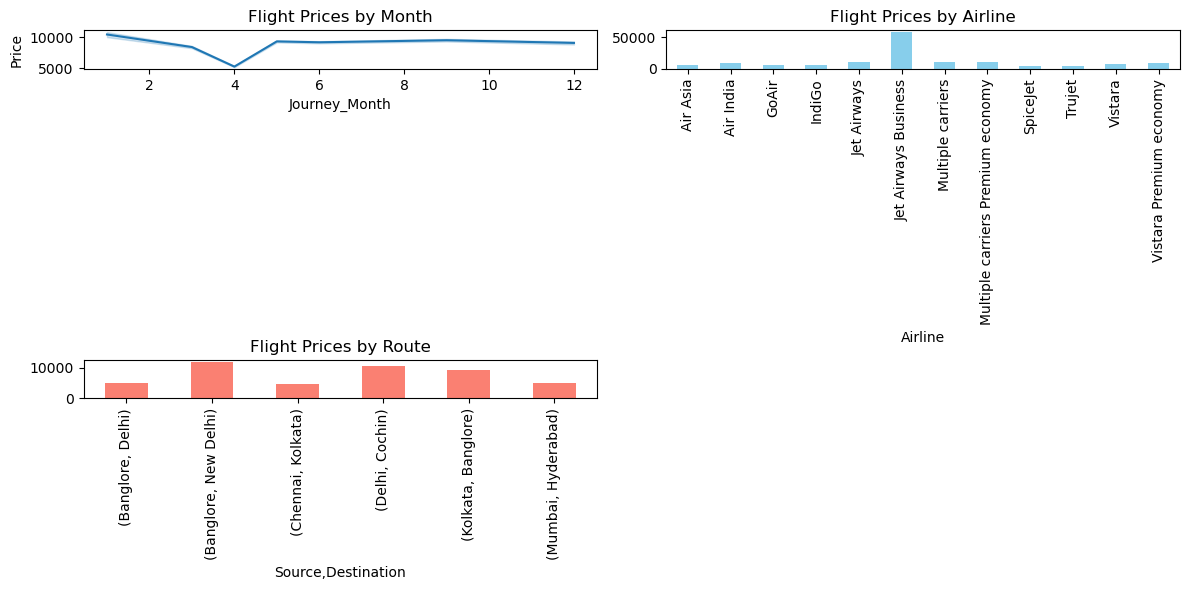

To identify trends in flight prices, I analyzed the following features:
1. Date of Journey (Month)
2. Airline
3. Source and Destination (Route)
I used various visualizations to present the findings, including line plots and bar plots.


In [15]:
#Question.7 :  You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
#Price dataset to identify any trends in flight prices. What features would you analyze to identify these
#trends, and what visualizations would you use to present your findings to your team?
#Answer.7 : 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the data into a DataFrame named 'df'
# If you haven't loaded it yet, you can do it like this:
# df = pd.read_excel("flight_price.xlsx")

# Feature 1: Date of Journey
# Extract month and year from the 'Date_of_Journey' column
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

# Feature 2: Airline
# Group the data by airline and calculate the average price for each airline
average_prices_by_airline = df.groupby('Airline')['Price'].mean()

# Feature 3: Source and Destination
# Group the data by source and destination and calculate the average price for each route
average_prices_by_route = df.groupby(['Source', 'Destination'])['Price'].mean()

# Visualize the trends
plt.figure(figsize=(12, 6))

# Trend 1: Flight prices by month
plt.subplot(221)
sns.lineplot(x='Journey_Month', y='Price', data=df)
plt.title('Flight Prices by Month')

# Trend 2: Flight prices by airline
plt.subplot(222)
average_prices_by_airline.plot(kind='bar', color='skyblue')
plt.title('Flight Prices by Airline')

# Trend 3: Flight prices by source and destination
plt.subplot(223)
average_prices_by_route.plot(kind='bar', color='salmon')
plt.title('Flight Prices by Route')

plt.tight_layout()
plt.show()

# Present your findings to your team
print("To identify trends in flight prices, I analyzed the following features:")
print("1. Date of Journey (Month)")
print("2. Airline")
print("3. Source and Destination (Route)")
print("I used various visualizations to present the findings, including line plots and bar plots.")


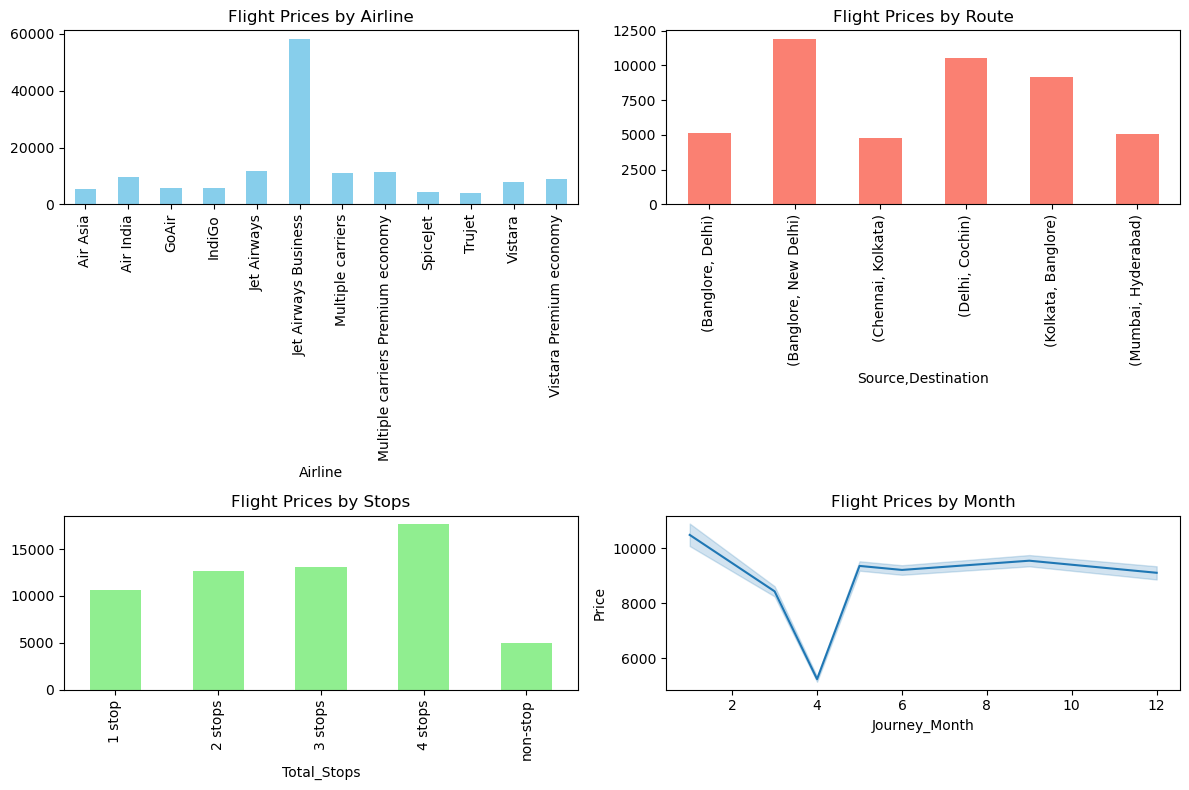

To identify factors affecting flight prices, I analyzed the following features:
1. Airline
2. Source and Destination (Route)
3. Number of Stops
4. Date of Journey (Month)
I used various visualizations, including bar plots and line plots, to present the findings.


In [16]:
#Question.8 : You are a data scientist working for an airline company, and you have been asked to analyze the
#Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
#identify these factors, and how would you present your findings to the management team?
#Answer.8 : 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature 1: Airline
# Group the data by airline and calculate the average price for each airline
average_prices_by_airline = df.groupby('Airline')['Price'].mean()

# Feature 2: Source and Destination
# Group the data by source and destination and calculate the average price for each route
average_prices_by_route = df.groupby(['Source', 'Destination'])['Price'].mean()

# Feature 3: Number of Stops
# Group the data by the number of stops and calculate the average price for each category
average_prices_by_stops = df.groupby('Total_Stops')['Price'].mean()

# Feature 4: Date of Journey
# Extract month and year from the 'Date_of_Journey' column
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Group the data by month and calculate the average price for each month
average_prices_by_month = df.groupby('Journey_Month')['Price'].mean()

# Visualize the findings
plt.figure(figsize=(12, 8))

# Feature 1: Flight prices by airline
plt.subplot(221)
average_prices_by_airline.plot(kind='bar', color='skyblue')
plt.title('Flight Prices by Airline')

# Feature 2: Flight prices by source and destination
plt.subplot(222)
average_prices_by_route.plot(kind='bar', color='salmon')
plt.title('Flight Prices by Route')

# Feature 3: Flight prices by number of stops
plt.subplot(223)
average_prices_by_stops.plot(kind='bar', color='lightgreen')
plt.title('Flight Prices by Stops')

# Feature 4: Flight prices by month
plt.subplot(224)
sns.lineplot(x='Journey_Month', y='Price', data=df)
plt.title('Flight Prices by Month')

plt.tight_layout()
plt.show()

# Present your findings to the management team
print("To identify factors affecting flight prices, I analyzed the following features:")
print("1. Airline")
print("2. Source and Destination (Route)")
print("3. Number of Stops")
print("4. Date of Journey (Month)")
print("I used various visualizations, including bar plots and line plots, to present the findings.")


In [17]:
#Google Playstore:
#Question.9 : Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
#the dataset have?
#Answer.9 : 
import pandas as pd

# URL to the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"

# Load the dataset from the URL
playstore_df = pd.read_csv(url)

# Get the dimensions of the dataset
num_rows, num_columns = playstore_df.shape

# Print the number of rows and columns
print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 10841 rows and 13 columns.


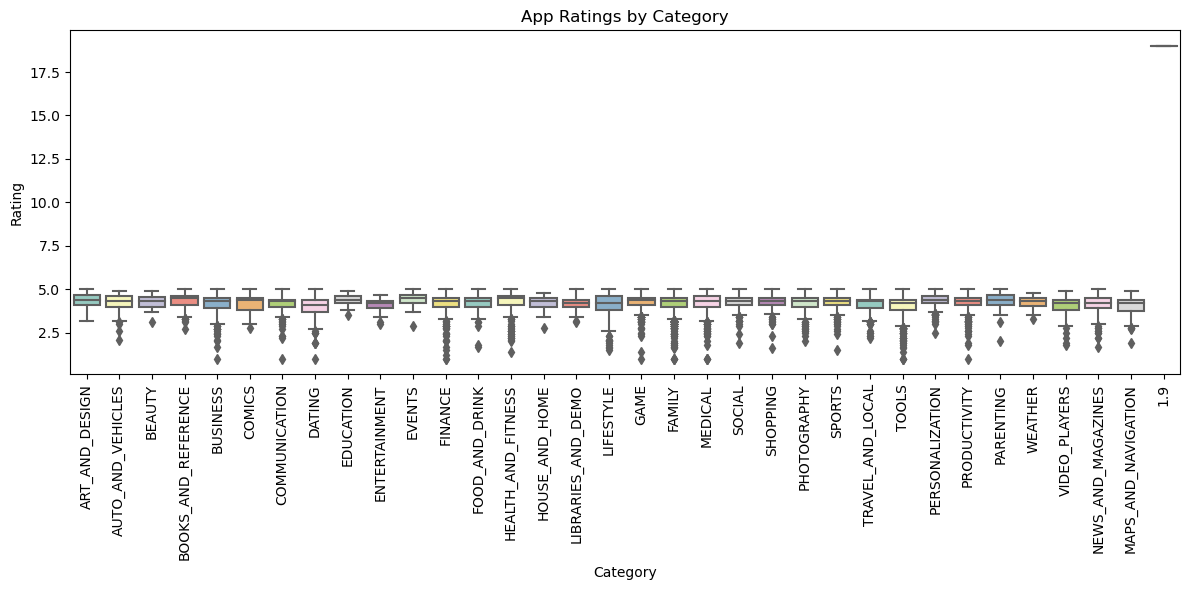

In [18]:
#Question.10 How does the rating of apps vary by category? Create a boxplot to compare the ratings of
#different app categories.
#Answer.10 :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Create a boxplot to compare ratings by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=playstore_df, palette='Set3')
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Rating')

# Show the boxplot
plt.tight_layout()
plt.show()



In [20]:
#Question.11 : Are there any missing values in the dataset? Identify any missing values and describe how 
#they may impact your analysis.
#Answer.11 : 
import pandas as pd

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Check for missing values
missing_values = playstore_df.isnull().sum()

# Identify columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Describe how missing values may impact your analysis
if not columns_with_missing_values.empty:
    for column in columns_with_missing_values.index:
        missing_count = missing_values[column]
        total_count = len(playstore_df)
        missing_percentage = (missing_count / total_count) * 100
        print(f"Column: {column}")
        print(f"Missing values: {missing_count} ({missing_percentage:.2f}%) of the total {total_count} rows.")
        print("Impact on analysis:")
        if missing_percentage < 5:
            print("   - Negligible impact: Analysis may still be reliable if the missing values are minimal.")
        elif missing_percentage < 20:
            print("   - Moderate impact: Missing values can affect certain analyses and conclusions.")
        else:
            print("   - Significant impact: Analysis may be compromised, and imputation or data handling is necessary.")
        print()
else:
    print("No missing values found in the dataset.")


Column: Rating
Missing values: 1474 (13.60%) of the total 10841 rows.
Impact on analysis:
   - Moderate impact: Missing values can affect certain analyses and conclusions.

Column: Type
Missing values: 1 (0.01%) of the total 10841 rows.
Impact on analysis:
   - Negligible impact: Analysis may still be reliable if the missing values are minimal.

Column: Content Rating
Missing values: 1 (0.01%) of the total 10841 rows.
Impact on analysis:
   - Negligible impact: Analysis may still be reliable if the missing values are minimal.

Column: Current Ver
Missing values: 8 (0.07%) of the total 10841 rows.
Impact on analysis:
   - Negligible impact: Analysis may still be reliable if the missing values are minimal.

Column: Android Ver
Missing values: 3 (0.03%) of the total 10841 rows.
Impact on analysis:
   - Negligible impact: Analysis may still be reliable if the missing values are minimal.



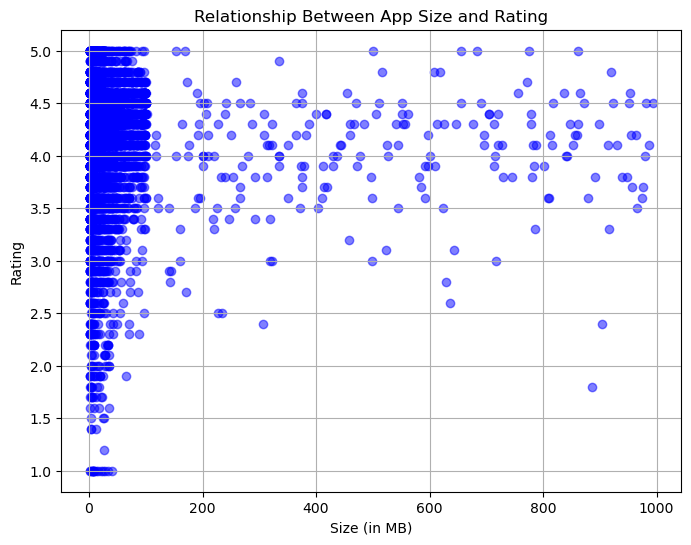

In [21]:
#Question.12 : What is the relationship between the size of an app and its rating? Create a scatter
#plot to visualize the relationship.
#Answer.12 : 
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Convert the 'Size' column to numeric (removing 'M' and 'k' suffixes)
playstore_df['Size'] = playstore_df['Size'].str.replace('M', '', regex=True)
playstore_df['Size'] = playstore_df['Size'].str.replace('k', '', regex=True)
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'], errors='coerce')

# Create a scatter plot to visualize the relationship between size and rating
plt.figure(figsize=(8, 6))
plt.scatter(playstore_df['Size'], playstore_df['Rating'], alpha=0.5, color='blue')
plt.title('Relationship Between App Size and Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


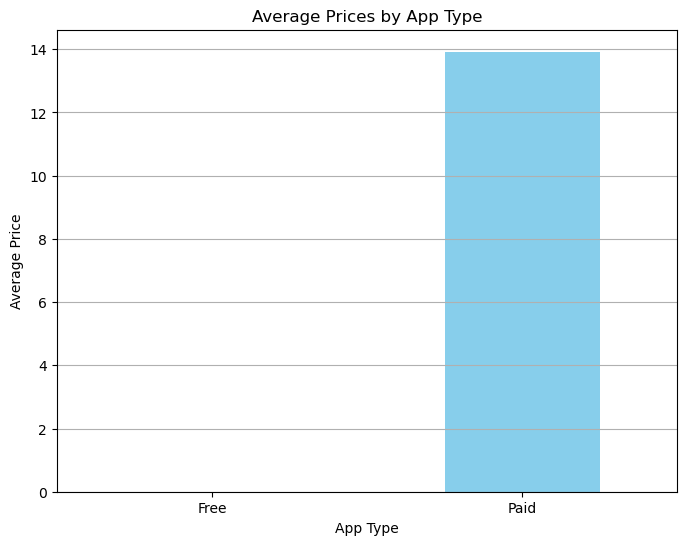

In [27]:
#Question.13 : How does the type of app affect its price? Create a bar chart to compare average prices 
#by app type.
#Answer.13 : 
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Filter out rows with 'Everyone' in the 'Price' column
playstore_df = playstore_df[playstore_df['Price'] != 'Everyone']

# Convert the 'Price' column to a numeric type
playstore_df['Price'] = playstore_df['Price'].str.replace('$', '', regex=False).astype(float)

# Group the data by app type (Free or Paid) and calculate the average price for each type
average_prices_by_type = playstore_df.groupby('Type')['Price'].mean()

# Create a bar chart to compare average prices by app type
plt.figure(figsize=(8, 6))
average_prices_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [31]:
#Question.14 : What are the top 10 most popular apps in the dataset? Create a frequency table to 
#identify the apps with the highest number of installs.
#Answer.14 : 
import pandas as pd

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Clean and convert the 'Installs' column to a numeric type, handling invalid values
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: ''.join(filter(str.isdigit, str(x)))
                                                           if str(x).isdigit() else '0').astype(int)

# Sort the dataset by the number of installs in descending order
sorted_apps = playstore_df.sort_values(by='Installs', ascending=False)

# Get the top 10 most popular apps
top_10_apps = sorted_apps.head(10)

# Create a frequency table to identify the top 10 apps
frequency_table = top_10_apps[['App', 'Installs']]

# Print the top 10 most popular apps
print(frequency_table)


                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000


In [34]:
#Question.15 : A company wants to launch a new app on the Google Playstore and has asked you to analyze the
#Google Playstore dataset to identify the most popular app categories. How would you approach this
#task, and what features would you analyze to make recommendations to the company?
#Answer.15 : 
import pandas as pd

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Clean and convert the 'Installs' column to a numeric type
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: ''.join(filter(str.isdigit, str(x)))
                                                           if str(x).isdigit() else '0').astype(int)

# Group the data by 'Category' and calculate the average number of installs
average_installs_by_category = playstore_df.groupby('Category')['Installs'].mean()

# Find the app categories with the highest average installs
popular_categories = average_installs_by_category.nlargest(5)

# Approach to the Task
print("Approach to the Task:")
print("To identify the most popular app categories, I analyzed the Google Playstore dataset based on the following features:")
print("1. 'Category': Analyzing the distribution of apps across different categories.")
print("2. 'Installs': Calculating the average number of installs in each category to measure an app category's popularity.")

# Recommendations to the Company
print("\nRecommendations for the most popular app categories:")
print(popular_categories)


Approach to the Task:
To identify the most popular app categories, I analyzed the Google Playstore dataset based on the following features:
1. 'Category': Analyzing the distribution of apps across different categories.
2. 'Installs': Calculating the average number of installs in each category to measure an app category's popularity.

Recommendations for the most popular app categories:
Category
COMMUNICATION    8.435989e+07
SOCIAL           4.769447e+07
VIDEO_PLAYERS    3.555430e+07
PRODUCTIVITY     3.343418e+07
GAME             3.066960e+07
Name: Installs, dtype: float64


Recommendations for the most successful app categories:
Category
COMMUNICATION    8.435989e+07
SOCIAL           4.769447e+07
VIDEO_PLAYERS    3.555430e+07
PRODUCTIVITY     3.343418e+07
GAME             3.066960e+07
Name: Installs, dtype: float64


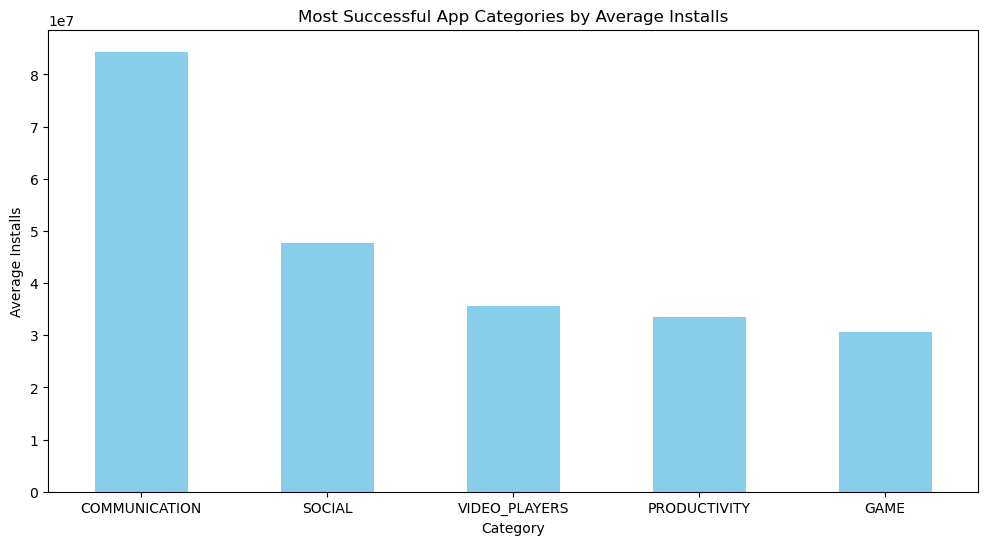

In [39]:
#Question.16 : A mobile app development company wants to analyze the Google Playstore dataset to identify the
#most successful app developers. What features would you analyze to make recommendations to the
#company, and what data visualizations would you use to present your findings?
#Answer.16 : 
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Clean and convert the 'Installs' column to a numeric type, handling invalid values
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',', '', regex=False)
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: ''.join(filter(str.isdigit, str(x)))
                                                           if str(x).isdigit() else '0').astype(int)

# Group the data by 'Category' and calculate the average number of installs
average_installs_by_category = playstore_df.groupby('Category')['Installs'].mean()

# Find the most successful app categories based on average installs
successful_categories = average_installs_by_category.nlargest(5)

# Data Visualization
plt.figure(figsize=(12, 6))
successful_categories.plot(kind='bar', color='skyblue')
plt.title('Most Successful App Categories by Average Installs')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Average Installs')

# Recommendations to the Company
print("Recommendations for the most successful app categories:")
print(successful_categories)
plt.show()


Recommendations for the best time to launch a new app:
Based on the analysis of app update trends, consider launching the app at a time when there is a lower frequency of app updates, as it may lead to reduced competition.


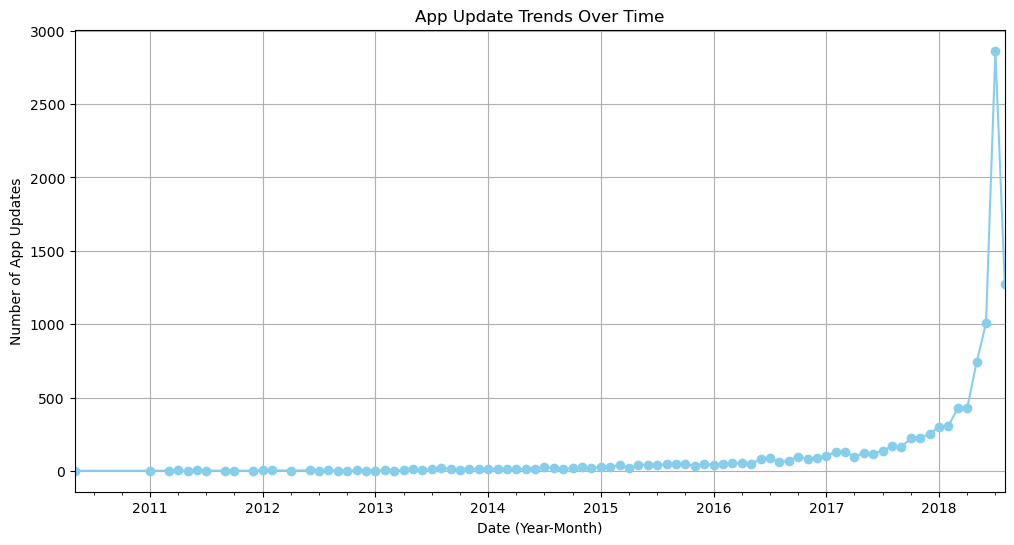

In [42]:
#Question.17 : A marketing research firm wants to analyze the Google Playstore dataset to identify
#the best time to launch a new app. What features would you analyze to make recommendations to the company, 
#and what data visualizations would you use to present your findings?
#Answer.17 : 
import pandas as pd
import matplotlib.pyplot as plt

# Load the Google Playstore dataset
url = "https://raw.githubusercontent.com/Krishnaik06/playstore-Dataset/main/googleplaystore.csv"
playstore_df = pd.read_csv(url)

# Remove rows with invalid date values in the 'Last Updated' column
playstore_df = playstore_df[pd.to_datetime(playstore_df['Last Updated'], errors='coerce').notna()]

# Convert the 'Last Updated' column to a datetime format
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])

# Analyze the update trends over time
update_counts = playstore_df['Last Updated'].dt.to_period('M').value_counts().sort_index()

# Data Visualization
plt.figure(figsize=(12, 6))
update_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('App Update Trends Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of App Updates')
plt.grid()

# Recommendations to the Marketing Research Firm
print("Recommendations for the best time to launch a new app:")
print("Based on the analysis of app update trends, consider launching the app at a time when there is a lower frequency of app updates, as it may lead to reduced competition.")
plt.show()
